<a href="https://colab.research.google.com/github/AmruthaReddy1397/DataScienceInternship/blob/main/TSF_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Assigned Task**

From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually. 

###**Unsupervised ML**

This task is done using k- means clustering

**K means** is one of the most popular Unsupervised Machine Learning Algorithms Used for Solving Classification Problems. K Means segregates the unlabeled data into various groups, called clusters, based on having similar features, common patterns.

K, here is the pre-defined number of clusters to be formed by the Algorithm. If K=3, It means the number of clusters to be formed from the dataset is 3

**Algorithm steps Of K Means**

The working of the K-Means algorithm is explained in the below steps:

Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: place a new centroid of each cluster.

Step-5: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

####**Step 1: Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as sm
import warnings
warnings.filterwarnings('ignore')


####**Step 2: Reading the dataset**

Create a dataframe df and use the read_csv() function provided by the pandas library to read the dataset

In [2]:
df = pd.read_csv("/content/sample_data/Iris.csv")

####**Step 3: Data Preprocessing and exploration**

In [3]:
#Displaying the dimensions of the dataset
df.shape

(150, 6)

In [4]:
#Displaying the first 10 rows of the given dataset
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#Displaying the unique values in the column species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# Samples from each species
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
#Showing the descriptive statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking for Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index (0,1,2,3) for the above four columns are used, as shown below:

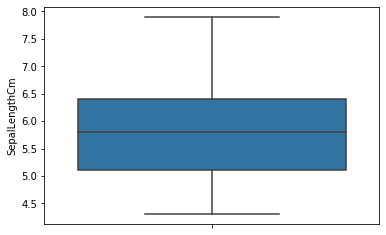

In [9]:
# to detect outliers
sns.boxplot(y=df['SepalLengthCm'])
plt.show()

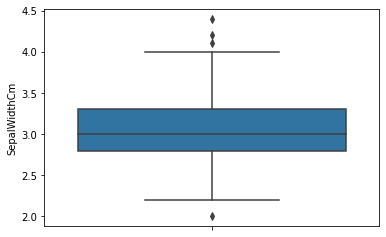

In [10]:
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

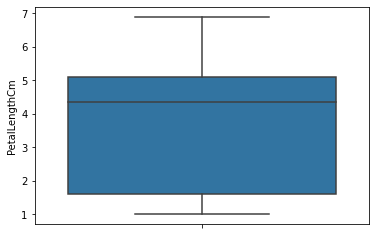

In [11]:
sns.boxplot(y=df['PetalLengthCm'])
plt.show()

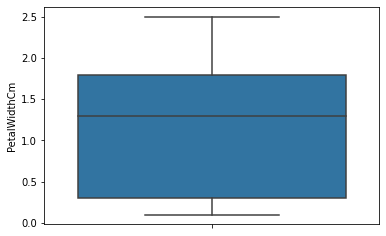

In [12]:
sns.boxplot(y=df['PetalWidthCm'])
plt.show()

From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'

In [13]:
# To remove outliers from 'sepal width (cm)'
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
df = df[(df['SepalWidthCm'] >= q1-1.5*iqr) & (df['SepalWidthCm'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 6)

We can see that after outlier treatment the number of rows are reduced to 146 from 150

In [14]:
x = df.iloc[:, [0,1,2,3]].values

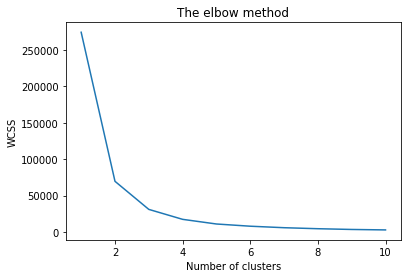

In [15]:
# Finding the optimum number of clusters for k-means classification

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

####**Step 4: Model Training**

In [16]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

####**Step 5: Visualization**

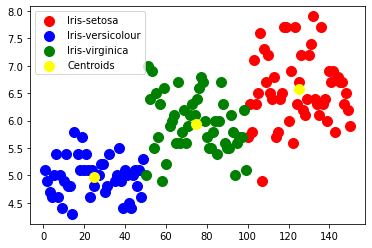

In [17]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**I was able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to identify optimal number of clusters**

**Thank You**